# Peer Graded Assignment:<br/>Центральная предельная теорема своими руками

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

В данной задаче будем рассматривать имеющую [Бета-распределение](https://ru.wikipedia.org/wiki/Бета-распределение) случайную величину $X \sim Beta(\alpha,\,\beta)$ с параметрами $\alpha = \beta = 0.75$.

Сгенерируем выборку объёма $N = 1000$, состоящую из реализаций случайной величины $X$:

In [2]:
N = 1000
a = b = 0.75
X = sts.beta(a, b)
sample = X.rvs(N)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины $X$.

In [3]:
# Fine-tune plots.
figure_params = dict(figsize = (8, 4))
subplots_params = dict(sharex = True, sharey = True, figsize = (13, 6))
plot_params = dict(linewidth = 2)
hist_params = dict(bins = 20, normed = True, alpha = 0.6)
title_params = dict(fontsize = 18)
xlabel_params = dict(fontsize = 18)
ylabel_params = dict(fontsize = 14)
legend_params = dict(loc = 'upper right')
xticklabels_params = dict(fontsize = 14)
yticklabels_params = dict(fontsize = 14)

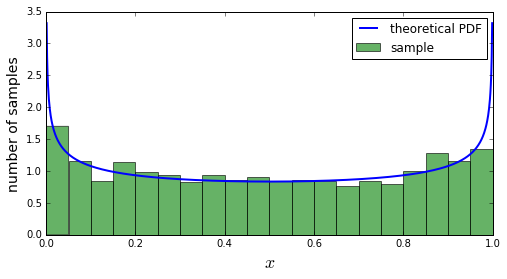

In [4]:
# Draw histogram and theoretical PDF for X sample.
dom = np.linspace(0, 1, 1000)
plt.figure(**figure_params)
plt.plot(dom, X.pdf(dom), label = 'theoretical PDF', **plot_params)
plt.hist(sample, label = 'sample', **hist_params)
plt.xlabel('$x$', **xlabel_params)
plt.ylabel('number of samples', **ylabel_params)
plt.legend(**legend_params)
plt.show()

Теперь оценим распределение выборочного среднего случайной величины $X$ при разных объемах выборок $n = \{5, 10, 50, 100\}$. Для каждого значения $n$ будем генерировать $N$ выборок объема $n$. Выборочные средние этих выборок образуют новую выборку. Для каждой такой выборки построим гистограмму, а поверх нее нарисуем плотность нормального распределения, соответствующего случайной величине $\bar{X}_n$ согласно центральной предельной теореме.

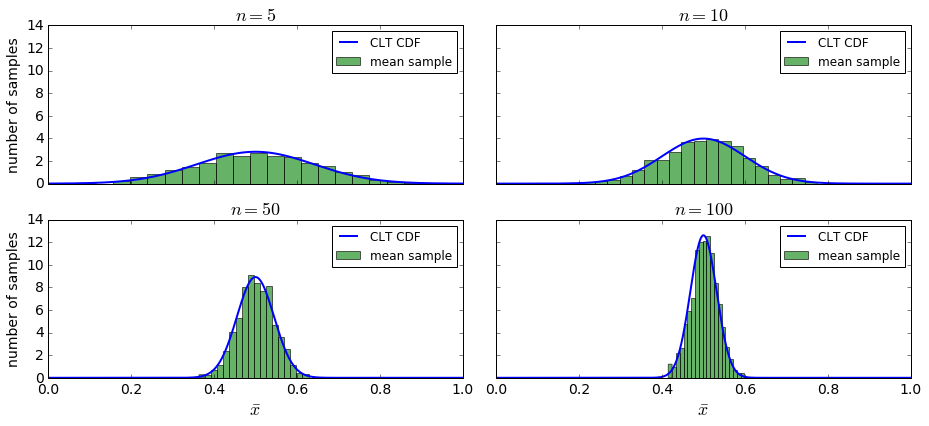

In [5]:
fig, plots = plt.subplots(2, 2, **subplots_params)

# Reshape plots for easy access in for loop.
plots = plots.ravel()

# Fine-tune figure.
plt.setp([p.get_xticklabels() for p in plots], **xticklabels_params)
plt.setp([p.get_yticklabels() for p in plots], **yticklabels_params)
plt.xlim([0, 1])

# For each sample size n do:
# 1. generate N samples of size n;
# 2. compute means of generated samples;
# 3. computed means give a new sample for sample mean random variable;
# 4. draw histogram for this sample;
# 5. using CLT compute normal distribution parameters for sample mean random variable;
# 6. draw PDF of normal distribution for sample mean random variable.
for i, n in enumerate([5, 10, 50, 100]):
    p = plots[i]
    
    # (1), (2), (3)
    s = np.array([X.rvs(n).mean() for _ in range(N)])
    
    # (5)
    mu = X.mean()
    sigma = np.sqrt(X.var() / n)
    X_mean = sts.norm(mu, sigma)
    
    # (6)
    p.plot(dom, X_mean.pdf(dom), label = 'CLT CDF', **plot_params)
    
    # (4)
    p.hist(s, label = 'mean sample', **hist_params)
    p.set_title('$n = %d$' % n, **title_params)
    p.legend(**legend_params)
    
    # Show labels on bottom and left sides only.
    if i > 1: p.set_xlabel('$\\bar{x}$', **xlabel_params)
    if i % 2 == 0: p.set_ylabel('number of samples', **ylabel_params)

plt.tight_layout()
plt.show()

Из графиков видно, что разброс значений выборочного среднего уменьшается с увеличением размера выборки, а распределение случайной величины $\bar{X}_n$ хорошо описывается нормальным распределением с параметрами, полученными в результате применения центральной предельной теоремы.

В силу того, что теоретические $\mathbb{E}X$ и $\mathbb{D}X$ не меняются, из основного утверждения центральной предельной теоремы $X \sim F(x),\, X^n = (X_1, X_2, \dots, X_n) \implies \bar{X}_n \sim \mathcal{N} \bigg(\mathbb{E}X, \frac{\mathbb{D}X}{n} \bigg)$ можно сделать вывод, что точность нормальной аппроксимации распределения выборочного среднего увеличивается с ростом $n$, т.к. дисперсия этого распределения обратно пропорциональна $n$.